In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()
data3 = df.copy()
data2 = df.copy()

In [3]:
data3

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,11719.0,0.00,C1848110361,2181900.90,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,3509.0,0.00,M982320760,0.00,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,20467.0,134838.60,C671501829,747527.75,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,82291.0,68875.18,M1025196660,0.00,0.00,0.0,0.0


### Hypothesis Testing for Gaussian Distribution

- **Null Hypothesis (H₀):** The sample has a Gaussian distribution in the numerical features.
- **Alternative Hypothesis (H₁):** The sample does not have a Gaussian distribution in the numerical features.

The **normal distribution**, also known as the **Gaussian
distribution** or **bell curve**, is a probability distribution that models how data is distributed around its mean or average value. The Gaussian distribution is a **continuous probability distribution** characterized by symmetry around its center, with its mean, median, and mode being equal.

This distribution is fundamental in statistics and data science, often used for processes and natural phenomena where values cluster around a central point with decreasing frequency as they move away from the mean.


In [4]:
numeric = [col for col in df.columns if df[col].dtype in ['int64','float64']]

### Importance of Normal Distribution in Hypothesis Testing

A key requirement for many hypothesis tests is that the data follows a **normal (Gaussian) distribution**. To verify if the data meets this requirement, we can use **D’Agostino’s K² Test** from the `stats` library.

This analytical test assesses whether the skewness and kurtosis of the dataset align with those of a Gaussian distribution. If the data significantly deviates from normality, this test will help us determine whether or not the data satisfies the assumption of normality essential for accurate hypothesis testing.


In [5]:
from scipy import stats
for col in df[numeric]:
    stat,p = stats.normaltest(df[col])
    print('Statistics=%.5f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f'looks Gaussian (fail to reject H0) for this column:{col}')
    else:
        print(f'does not look Gaussian(reject H0) for this column:{col}')


Statistics=29930.33535, p=0.000
does not look Gaussian(reject H0) for this column:step
Statistics=321317.13115, p=0.000
does not look Gaussian(reject H0) for this column:amount
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:oldbalanceOrg
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:newbalanceOrig
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:oldbalanceDest
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:newbalanceDest
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:isFraud
Statistics=nan, p=nan
does not look Gaussian(reject H0) for this column:isFlaggedFraud


### Gaussian Distribution Check Results

After applying **D’Agostino’s K² Test**, we found that none of our numerical features follow a **Gaussian (normal) distribution**. This non-normality suggests that the data may contain values that are significantly distant from the mean, mode, and median—potential indicators of **outliers**.

These outliers can skew our data and affect the results of hypothesis tests and model performance. To gain further insights, we will conduct additional analysis to identify and evaluate potential outliers in our dataset.


### Data Preparation and Processing

At this stage, the primary focus is on organizing the data to ensure it is ready for analysis. The goal is to achieve **cleanliness** and **consistency** in the dataset, which involves several steps:

1. **Handling Missing Values:** Identifying and addressing any missing or incomplete data points.
2. **Removing or Treating Outliers:** Detecting and managing outliers that could distort analysis.
3. **Data Transformation:** Normalizing, scaling, or encoding data to fit the requirements of the model or statistical tests.
4. **Feature Engineering:** Creating new features or modifying existing ones to improve model performance.
5. **Data Type Conversion:** Ensuring that all variables are in appropriate formats for further analysis.

By the end of this process, the dataset will be cleaned, consistent, and ready for deeper analysis or modeling.


### 3.1 Cleaning the Data

In this section, I will summarize the key activities involved in cleaning the Data Frames to ensure they are fit for analysis:

1. **Handling Missing Data:**
   - Missing values were detected and addressed either by removing rows with missing values or imputing missing data using appropriate statistical methods (e.g., mean, median, mode, or more advanced techniques like KNN imputation).

2. **Dealing with Outliers:**
   - Outliers were identified using various techniques (such as box plots or z-scores) and treated accordingly, either by capping extreme values, transforming the data, or removing the outliers entirely.

3. **Duplicated Data:**
   - Any duplicated rows were detected and removed to avoid redundancy and ensure data integrity.

4. **Correcting Data Types:**
   - Ensured that each feature had the correct data type (e.g., converting strings to dates, integers to floats, or categoricals where appropriate).

These steps helped in ensuring that the data was clean, consistent, and ready for further analysis.


# Rename the columns for better readability.

In [6]:
df.rename(columns={
    'step': 'time_step',
    'type': 'trans_type',
    'amount': 'trans_amt',
    'nameOrig': 'cust_orig',
    'oldbalanceOrg': 'old_orig_bal',
    'newbalanceOrig': 'new_orig_bal',
    'nameDest': 'cust_dest',
    'oldbalanceDest': 'old_dest_bal',
    'newbalanceDest': 'new_dest_bal'
}, inplace=True)

In [7]:
df

,time_step,trans_type,trans_amt,cust_orig,old_orig_bal,new_orig_bal,cust_dest,old_dest_bal,new_dest_bal,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,11719.0,0.00,C1848110361,2181900.90,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,3509.0,0.00,M982320760,0.00,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,20467.0,134838.60,C671501829,747527.75,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,82291.0,68875.18,M1025196660,0.00,0.00,0.0,0.0


# Check for outliers only in the columns that shouldn’t have outliers.

In [8]:
# Dropping non-numeric columns for outlier detection
data = df.drop(['trans_type', 'time_step', 'isFraud', 'isFlaggedFraud'], axis=1)

# Ensure that only numeric columns are used for outlier detection
numeric_data = data.select_dtypes(include=[float, int])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Check for outliers in numerical columns
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any()

# Display columns with outliers
outliers

,0
trans_amt,True
old_orig_bal,True
new_orig_bal,True
old_dest_bal,True
new_dest_bal,True


The results above showed there are outliers, but these outliers are probably because of fraudulent transactions. Let’s confirm outliers visually with a boxplot.

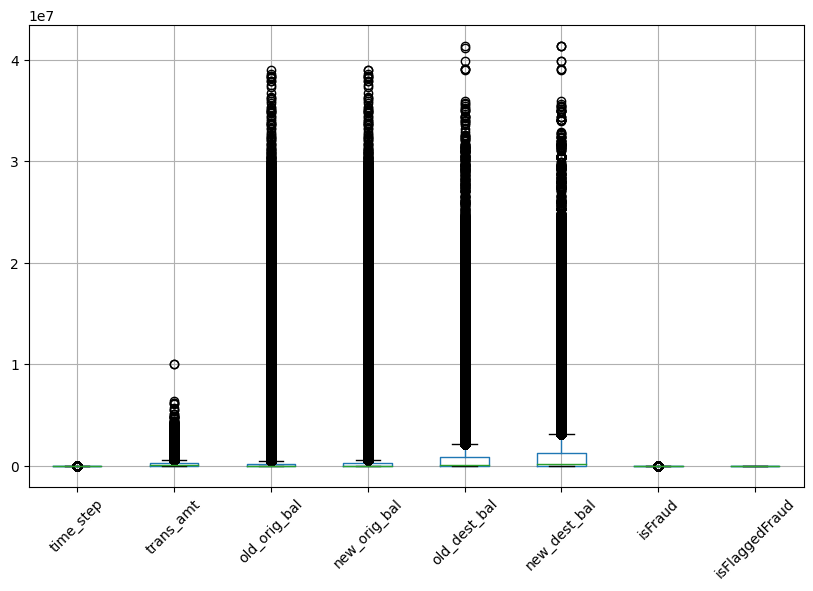

In [9]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Outlier Removal Tradeoff

When removing outliers, we must carefully determine the threshold for what qualifies as an outlier. This is typically done by multiplying a constant (e.g., 1.5) by the **Interquartile Range (IQR)**.

#### Tradeoff:
- **Higher Threshold:** Detects fewer outliers, focusing only on more extreme deviations. This reduces the risk of **information loss** and preserves data that might be valuable for the model.
- **Lower Threshold:** Detects more outliers, but this could result in removing too much data, including valuable information. This could lead to **model performance degradation** due to loss of relevant patterns or trends in the data.

To balance this tradeoff, we often focus on removing only **extreme outliers** to avoid losing crucial information.

### Code for Removing Outliers:

In [10]:
# Iterate over only the numeric columns in the DataFrame
for col in df.select_dtypes(include=[float, int]).columns.tolist():
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine outliers for this column
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    # Print information about outliers
    print(f"Column: {col}")
    print(f"Number of outliers: {is_outlier.sum()}")

Column: time_step
Number of outliers: 4274
Column: trans_amt
Number of outliers: 16968
Column: old_orig_bal
Number of outliers: 55636
Column: new_orig_bal
Number of outliers: 52222
Column: old_dest_bal
Number of outliers: 39398
Column: new_dest_bal
Number of outliers: 34535
Column: isFraud
Number of outliers: 187
Column: isFlaggedFraud
Number of outliers: 0


### Questions for Exploratory Data Analysis (EDA)

To guide our Exploratory Data Analysis (EDA), we will focus on the following questions:

1. **Does fraud occur at a certain transaction amount?**
   - Investigating the distribution of transaction amounts among fraudulent and non-fraudulent transactions can help identify any patterns or thresholds.

2. **Does transaction type affect fraud?**
   - Analyzing the frequency of fraud across different transaction types will reveal whether certain types are more susceptible to fraudulent activities.

3. **What about the other categories; do they affect fraud?**
   - Examining other categorical variables (e.g., user demographics, location) can provide insights into whether they correlate with fraud occurrences.

4. **Is there multi-collinearity in our data?**
   - Checking for multi-collinearity among features is essential to understand if some variables are too closely related, which could impact model performance.

5. **Should we consider timing when checking for fraud?**
   - Analyzing the temporal aspect of transactions (e.g., time of day, day of the week) can uncover patterns that indicate increased fraud risk during certain periods.

These questions will drive our analysis and help us uncover meaningful insights from the dataset to inform further modeling and decision-making.


### Bivariate Analysis: Does Fraud Occur at a Certain Transaction Amount?

To explore whether fraud occurs at specific transaction amounts, we can conduct a bivariate analysis by examining the relationship between the transaction amount and the occurrence of fraud. Here are the steps to analyze this question:

1. **Data Visualization:**
   - Create visualizations to observe the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.
   - Use box plots, histograms, or violin plots to visualize differences in transaction amounts between these two groups.

2. **Statistical Analysis:**
   - Conduct a statistical test (e.g., t-test or Mann-Whitney U test) to determine if there is a significant difference in transaction amounts between fraudulent and non-fraudulent transactions.

3. **Correlation Analysis:**
   - Calculate the correlation coefficient between transaction amount and fraud occurrence to quantify the strength and direction of the relationship.

### Example Code

Here's an example of how you might implement this analysis in Python using libraries like Pandas, Matplotlib, and Seaborn:



In [11]:
df

,time_step,trans_type,trans_amt,cust_orig,old_orig_bal,new_orig_bal,cust_dest,old_dest_bal,new_dest_bal,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,11719.0,0.00,C1848110361,2181900.90,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,3509.0,0.00,M982320760,0.00,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,20467.0,134838.60,C671501829,747527.75,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,82291.0,68875.18,M1025196660,0.00,0.00,0.0,0.0


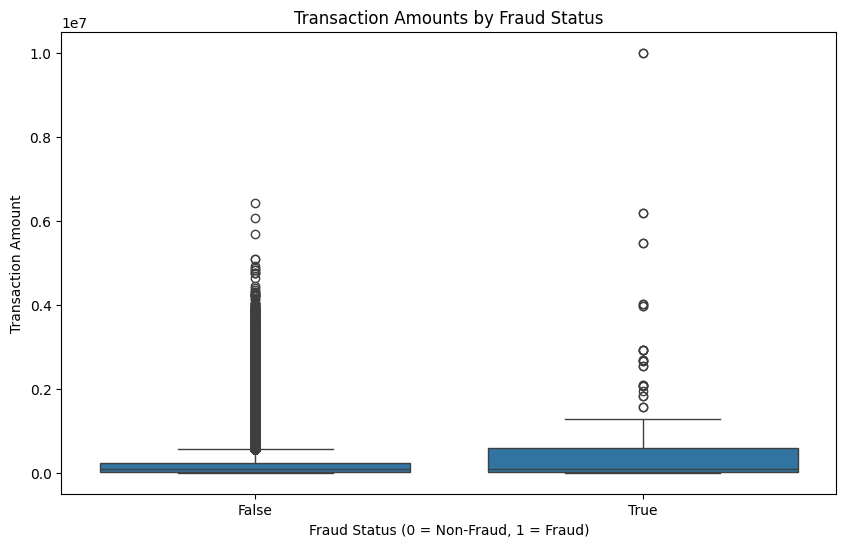

T-statistic: 25.18193504478315, P-value: 8.701762594427629e-140


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assume df is your DataFrame containing the data
# Create a new column for fraud as a binary variable
df['isFraud'] = df['isFraud'].astype(bool)

# Visualization: Box plot for transaction amounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='trans_amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Statistical Analysis: T-test
fraudulent_amounts = df[df['isFraud'] == 1]['trans_amt']
non_fraudulent_amounts = df[df['isFraud'] == 0]['trans_amt']

t_stat, p_value = stats.ttest_ind(fraudulent_amounts, non_fraudulent_amounts)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

### Code Explanation

This code snippet performs a logarithmic transformation on transaction amounts in a DataFrame and visualizes their distribution based on fraud status.

1. **Importing Libraries**: The code begins by importing necessary libraries: NumPy for numerical operations, Pandas for data manipulation, Seaborn for statistical data visualization, and Matplotlib for creating plots.

2. **Creating a Copy of the DataFrame**: A copy of the original DataFrame `data2` is created to avoid modifying the original dataset. This is done using `df = data2.copy()`.

3. **Checking for the Presence of the `isFraud` Column**: Before proceeding, the code checks if the `isFraud` column exists in the DataFrame. If it’s missing, an error message is printed. This is crucial for ensuring that the plot can differentiate between fraudulent and non-fraudulent transactions.

4. **Logarithmic Transformation of Transaction Amounts**: The `amount` column is transformed using `np.log1p(df['amount'])`, which computes \( \log(1 + x) \) to handle values including zero safely. The transformed values are stored in a new column named `log_trans_amt`.

5. **Plotting the Transformed Data**: A histogram is created using Seaborn's `histplot()` function, plotting the `log_trans_amt` with the `hue` parameter set to `isFraud` to differentiate by fraud status. The figure size is set to 12x6, and the plot includes appropriate axis labels and a title for clarity.

6. **Optional Column Cleanup**: Finally, the `log_trans_amt` column is dropped from the DataFrame using `df.drop('log_trans_amt', axis=1, inplace=True)` after visualization, as it may not be needed for further analysis.

Overall, this code effectively analyzes transaction amounts and their relation to fraud through transformation and visualization, providing insights into the dataset.


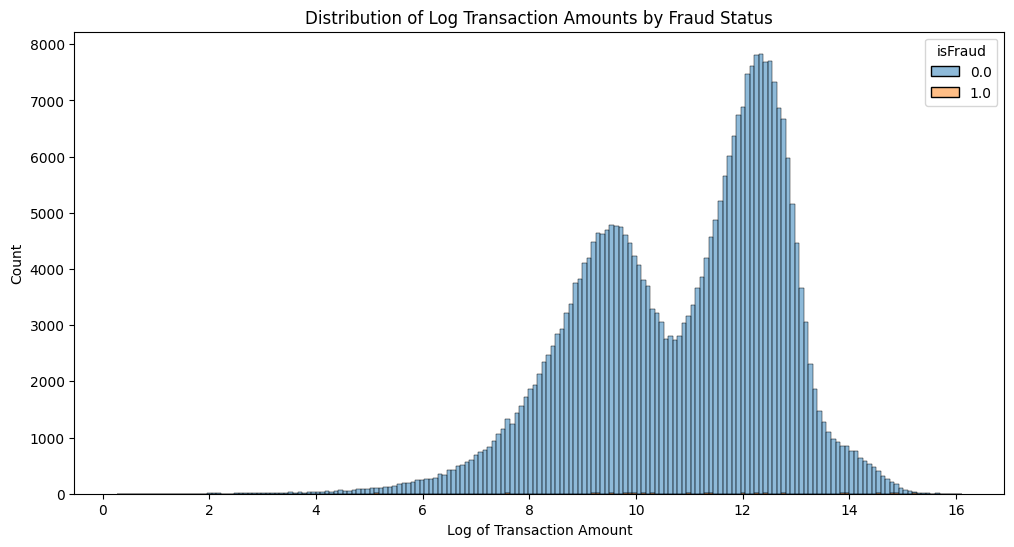

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your original DataFrame and 'trans_amt' is the column of interest
df = data2.copy()  # Create a copy of the DataFrame to avoid modifying the original

# Check if 'isFraud' exists before proceeding
if 'isFraud' not in df.columns:
    print("Error: 'isFraud' column is missing from the DataFrame.")
else:
    # Apply logarithmic transformation to 'trans_amt' to handle skewness
    df['log_trans_amt'] = np.log1p(df['amount'])  # Using log1p to avoid log(0)

    # Create a plot with the transformed data
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='log_trans_amt', hue='isFraud', multiple='stack', alpha=0.5)
    plt.xlabel('Log of Transaction Amount')
    plt.ylabel('Count')
    plt.title('Distribution of Log Transaction Amounts by Fraud Status')
    plt.show()

    # Optionally drop the log_trans_amt column if not needed later
    df.drop('log_trans_amt', axis=1, inplace=True)


Yes, the above chart indicates the that fraud only occurs at a certain range, but we can see that the fraud cases are very small compared to the cases of no fraud, this implies that our target (isFraud) is imbalanced. There are very little cases of fraud present in our dataset. We will investigate this later.

Q2. Does transaction type affect fraud?

### Q2. Does Transaction Type Affect Fraud?

To analyze whether transaction type affects fraud, we can follow a structured approach that includes data preparation, visualization, and statistical testing.

#### Steps to Analyze the Impact of Transaction Type on Fraud

1. **Data Preparation**:
   - Ensure the DataFrame contains the necessary columns: `trans_type` (transaction type) and `isFraud` (fraud status).

2. **Visualization**:
   - Create a bar plot or count plot to visualize the distribution of fraud occurrences across different transaction types. This helps identify any trends or patterns related to fraud.

3. **Statistical Test**:
   - Conduct a Chi-square test for independence to determine if there is a significant association between transaction type and fraud status.

#### Example Code

Below is a Python code snippet implementing the above steps using libraries like Pandas, Seaborn, and SciPy:





In [14]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,11719.0,0.00,C1848110361,2181900.90,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,3509.0,0.00,M982320760,0.00,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,20467.0,134838.60,C671501829,747527.75,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,82291.0,68875.18,M1025196660,0.00,0.00,0.0,0.0


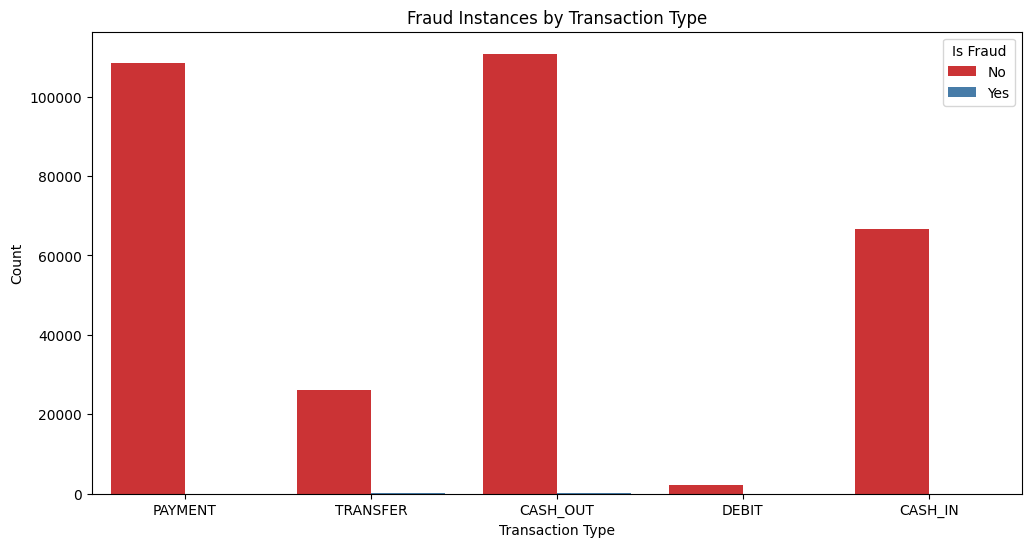

Chi-square statistic: 483.56, p-value: 0.0000
Reject the null hypothesis: There is a significant association between transaction type and fraud.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame
data2 = df.copy()  # Create a copy to avoid modifying the original
data2['isFraud'] = data3['isFraud']
# Check if 'type' and 'isFraud' exist
if 'type' not in df.columns or 'isFraud' not in df.columns:
    print("Error: Necessary columns are missing.")
else:
    # 1. Visualization
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='type', hue='isFraud', palette='Set1')
    plt.title('Fraud Instances by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.legend(title='Is Fraud', loc='upper right', labels=['No', 'Yes'])
    plt.show()

    # 2. Chi-square test for independence
    contingency_table = pd.crosstab(df['type'], df['isFraud'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

    # Interpretation
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between transaction type and fraud.")
    else:
        print("Fail to reject the null hypothesis: No significant association between transaction type and fraud.")


In [16]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,11719.0,0.00,C1848110361,2181900.90,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,3509.0,0.00,M982320760,0.00,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,20467.0,134838.60,C671501829,747527.75,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,82291.0,68875.18,M1025196660,0.00,0.00,0.0,0.0


## Multivariate Analysis

### Introduction
Multivariate analysis involves examining the relationships between three or more variables simultaneously. In the context of fraud detection, it helps to identify complex interactions between various features (e.g., transaction amount, transaction type, account balances) and their combined effect on fraud occurrence.

### Key Questions for Multivariate Analysis
1. How do transaction amount and transaction type together influence fraud detection?
2. Is there a significant interaction effect between account balances (old and new) and transaction type on fraud occurrence?
3. How do the temporal aspects (steps or time of transaction) interact with transaction type and amount to affect fraud rates?

### Methods for Multivariate Analysis
1. **Pairwise Correlation**: Use correlation matrices to explore relationships between numeric variables.
2. **Group By Analysis**: Analyze aggregated statistics for combinations of categorical features.
3. **Visualization**: Create multi-dimensional visualizations (e.g., heatmaps, pair plots) to identify patterns.
4. **Statistical Testing**: Use techniques like MANOVA (Multivariate Analysis of Variance) to assess the impact of multiple independent variables on a dependent variable.

### Example Code

Below is an example of how to conduct a multivariate analysis focusing on transaction type, amount, and their interaction:




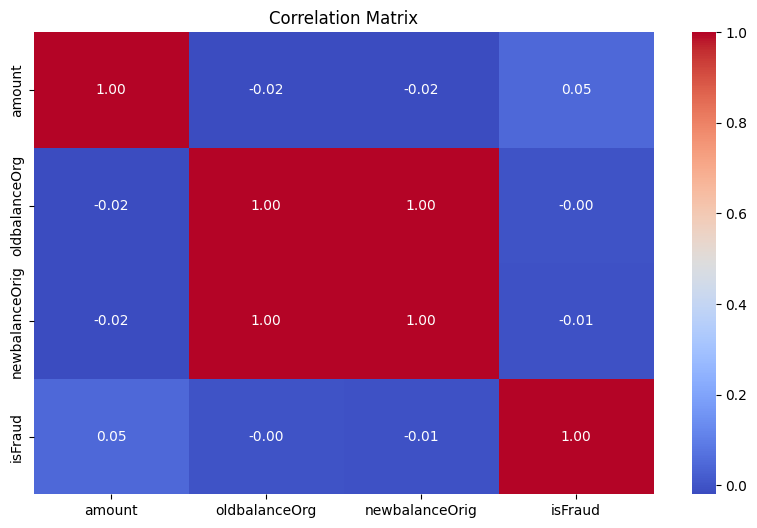

                         amount               oldbalanceOrg newbalanceOrig
                           mean           sum          mean           mean
type     isFraud                                                          
CASH_IN  0.0      179986.226664  1.200832e+10  3.776534e+06   3.956431e+06
CASH_OUT 0.0      198667.276101  2.201114e+10  7.641678e+04   4.263914e+04
         1.0      697210.316875  6.693219e+07  6.767336e+05   0.000000e+00
DEBIT    0.0        7846.047041  1.818714e+07  1.093918e+05   1.043638e+05
PAYMENT  0.0       11861.421063  1.286940e+09  1.482989e+05   1.416398e+05
TRANSFER 0.0      757964.552840  1.984579e+10  8.025440e+04   2.476282e+04
         1.0      759247.382527  6.909151e+07  7.627383e+05   3.706963e+04


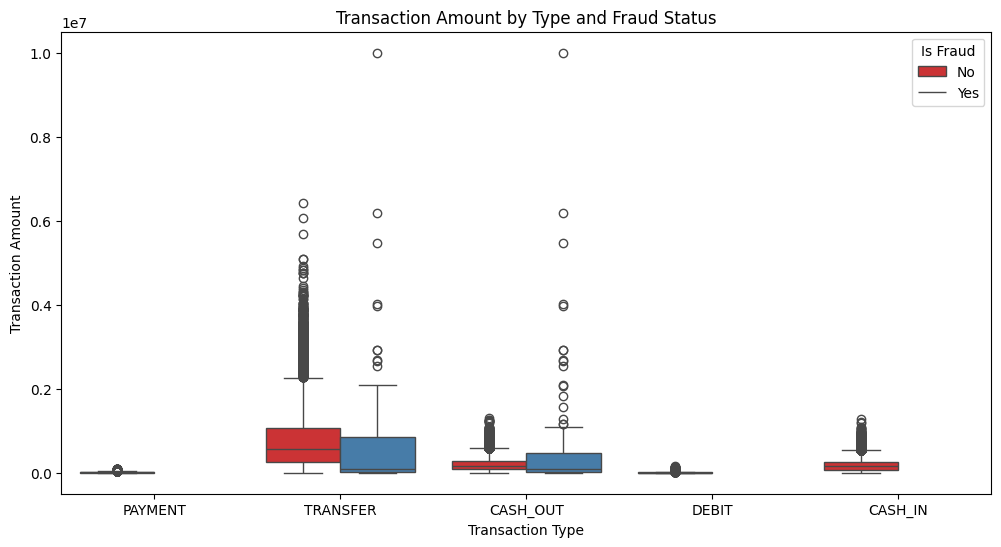

                          sum_sq        df             F         PR(>F)
C(type)             1.469769e+16       4.0  71830.420936   0.000000e+00
C(isFraud)                   NaN       1.0           NaN            NaN
C(type):C(isFraud)  4.767966e+13       4.0    233.019537  7.512112e-102
Residual            1.609775e+16  314691.0           NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data' is your DataFrame
df = data3.copy()  # Create a copy to avoid modifying the original

# Check for necessary columns
if all(col in df.columns for col in ['amount', 'type', 'isFraud']):
    # 1. Pairwise Correlation
    correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # 2. Group By Analysis
    fraud_analysis = df.groupby(['type', 'isFraud']).agg({'amount': ['mean', 'sum'], 'oldbalanceOrg': 'mean', 'newbalanceOrig': 'mean'})
    print(fraud_analysis)

    # 3. Visualization of Interaction between Transaction Type and Amount
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='type', y='amount', hue='isFraud', palette='Set1')
    plt.title('Transaction Amount by Type and Fraud Status')
    plt.xlabel('Transaction Type')
    plt.ylabel('Transaction Amount')
    plt.legend(title='Is Fraud', loc='upper right', labels=['No', 'Yes'])
    plt.show()

    # 4. MANOVA
    model = ols('amount ~ C(type) + C(isFraud) + C(type):C(isFraud)', data=df).fit()
    manova = sm.stats.anova_lm(model, typ=2)
    print(manova)
else:
    print("Error: Necessary columns are missing.")

## Multicollinearity Analysis

### Understanding Multicollinearity
- **Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated. This can lead to unreliable coefficient estimates and difficulties in determining the individual effect of each variable on the dependent variable.
- Common methods to detect multicollinearity include:
  1. **Correlation Matrix**: A table showing the correlation coefficients between pairs of variables, providing a quick overview of relationships.
  2. **Variance Inflation Factor (VIF)**: A measure that quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

### Steps for Assessing Multicollinearity

1. **Correlation Matrix**:
   - Calculate the correlation matrix for the numeric features in the dataset.
   - Visualize the correlation matrix using a heatmap. High correlation values (close to 1 or -1) between pairs of features indicate potential multicollinearity.

2. **Variance Inflation Factor (VIF)**:
   - Compute the VIF for each numeric feature. A VIF value quantifies how much the variance of a regression coefficient is increased because of multicollinearity.
   - Typically, a VIF value greater than 10 suggests high multicollinearity, which may require further investigation.

3. **Interpretation**:
   - Review the results from the correlation matrix and VIF calculations.
   - If any features exhibit high multicollinearity (e.g., high correlation coefficients or high VIF values), consider removing or combining those features to improve the robustness and interpretability of your regression model.

### Conclusion
By following these steps, you can effectively assess multicollinearity in your dataset. Addressing multicollinearity is crucial for enhancing the performance of regression models and ensuring reliable interpretation of the results. If you detect high multicollinearity, it may be beneficial to refine your feature set.


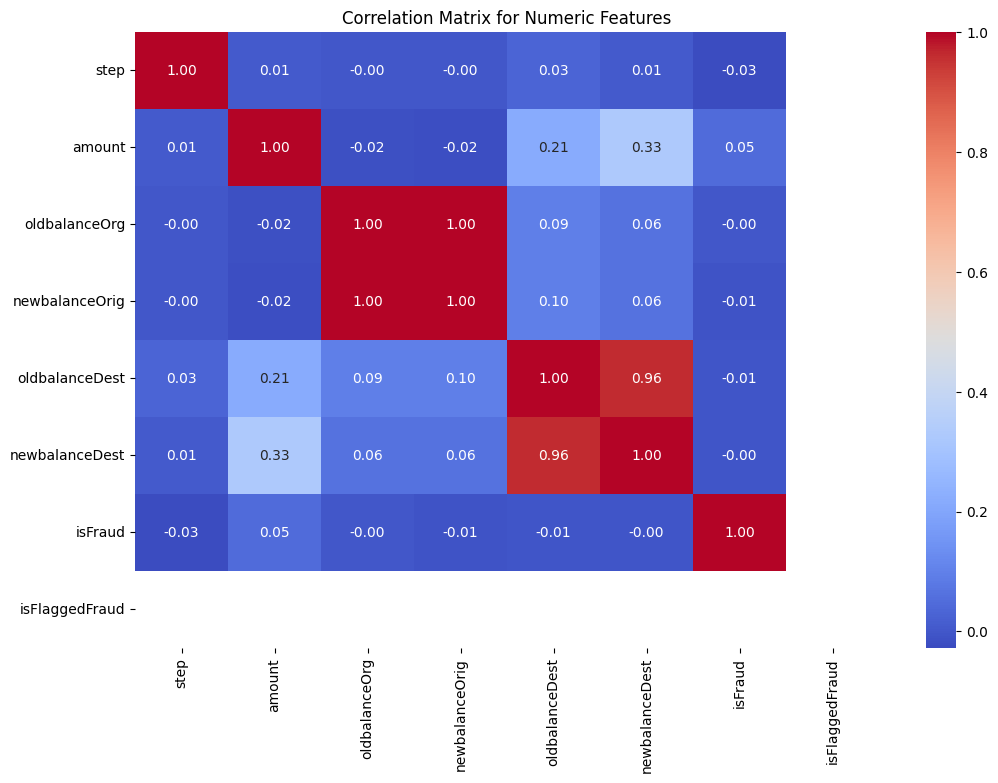

In [18]:
# Filter for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Check if there are any numeric columns
if not numeric_df.empty:
    # 1. Correlation Matrix
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix for Numeric Features')
    plt.show()
else:
    print("No numeric columns found for correlation analysis.")


## Interpretation of Correlation Matrix

In the correlation matrix, lighter colors indicate high correlation between variables. Upon analyzing the matrix, we observe two pairs of features that exhibit high correlation. This observation raises an important consideration regarding multicollinearity in our dataset.

### Implications of High Correlation
High correlation between two features implies that they behave similarly; that is, when one feature increases or decreases, the other tends to do the same. This redundancy can lead to the following issues in our machine learning models:

1. **Redundancy**: Including both correlated features in the model may not provide additional useful information since they convey similar data patterns. This can lead to unnecessarily complex models.

2. **Model Interpretability**: Having multiple features that reflect the same underlying phenomenon can make it more challenging to interpret the model's results, as it becomes difficult to determine the individual impact of each feature.

3. **Instability in Coefficient Estimates**: Multicollinearity can inflate the variance of coefficient estimates, making the model sensitive to small changes in the data. This can lead to less reliable predictions and reduced model performance.

### Conclusion
To improve our machine learning model, we should consider removing one of the features from each pair of highly correlated variables. This step will help simplify the model, enhance interpretability, and potentially improve the overall performance of our predictive analytics.


To simplify our training process, we will drop one from each pair.

Let’s confirm the pairs manually with code. If correlation is greater than 0.5, our code will return the pair that has high correlation.

In [19]:
# correlation heatmap df
correlation = df[numeric].corr()

# Get column pairs with correlation > 0.5
high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.5:
            high_corr_pairs.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

# Check if there are high correlation pairs
if high_corr_pairs:
    # Print column pairs with correlation > 0.5 and their correlation values
    for pair in high_corr_pairs:
        print(pair[0], "-", pair[1], "Correlation:", pair[2])
else:
    print("No high correlation columns")

oldbalanceOrg - newbalanceOrig Correlation: 0.9990743208312137
oldbalanceDest - newbalanceDest Correlation: 0.9613544123721586


In [20]:
# so we will drop one from each pair
df.drop(columns=['oldbalanceOrg', 'oldbalanceDest'], inplace=True)

Dropping one from each pair since they have a high correlation:

In [21]:
df


,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
314694,16,CASH_OUT,359950.11,C622142425,0.00,C1848110361,2717203.17,0.0,0.0
314695,16,PAYMENT,4032.79,C861304824,0.00,M982320760,0.00,0.0,0.0
314696,16,CASH_IN,114371.60,C829816201,134838.60,C671501829,633156.15,0.0,0.0
314697,16,PAYMENT,13415.82,C1030884245,68875.18,M1025196660,0.00,0.0,0.0


In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X = df.drop('isFraud', axis=1)
y = df.isFraud

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels=['type','nameOrig','nameDest']

# Loop through each specified column and apply LabelEncoder
for col in labels:
    df[col] = le.fit_transform(df[col])

In [28]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
newbalanceOrig,1
nameDest,0
newbalanceDest,1
isFraud,1
isFlaggedFraud,1


In [33]:
df['isFraud'].fillna(df['isFraud'].mode()[0],inplace=True)

<ipython-input-33-0247e5ef16e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['isFraud'].fillna(df['isFraud'].mode()[0],inplace=True)


In [34]:
df['isFlaggedFraud'].fillna(df['isFlaggedFraud'].mode()[0],inplace=True)

<ipython-input-34-d80a8b0727b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['isFlaggedFraud'].fillna(df['isFlaggedFraud'].mode()[0],inplace=True)


In [35]:
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

<ipython-input-35-89a9083303e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)


In [31]:
df['isFraud'].mode()[0]

0.0

In [36]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
newbalanceOrig,1
nameDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [37]:
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)

<ipython-input-37-97f49297a7b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)


In [38]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
newbalanceOrig,0
nameDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Assuming 'df' is your original DataFrame

# 1. Perform Label Encoding before train-test split
le = LabelEncoder()
labels=['type','nameOrig','nameDest']

# Loop through each specified column and apply LabelEncoder
for col in labels:
    df[col] = le.fit_transform(df[col])

# 2. Now perform the train-test split
X = df.drop('isFraud', axis=1)
y = df.isFraud
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 3. Train the model
model = SVC()
model.fit(X_train,y_train)

SVC()

In [40]:
model.score(X_test,y_test)

0.9995551318716238

In [41]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [44]:
model2.score(X_test,y_test)

0.9995551318716238

In [48]:
model2.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])